## Exercise2

In this exercise, we'll use a bloom filter to identify a correct word from a single-character typo. This is computationally the same problem as mapping a gene with a single nucleotide permutation to multiple reference genomes (this would be too many possibilities to keep all in memory, hence the use of a bloom filter). We'll talk about sequence alignment later in the course, which is a different but related problem.

Download the list of English words from https://github.com/dwyl/english-words/blob/master/words.txt

This list may be read in one-at-a-time for processing via e.g.


Implement a Bloom Filter "from scratch" using a bitarray (6 points):

These hash functions all return integers in [0, size), where size is some integer specified elsewhere.

Write a function that suggests spelling corrections using the bloom filter as follows: Try all possible single letter substitutions and see which ones are identified by the filter as possibly words. This algorithm will always find the intended word for this data set, and possibly other words as well. (8 points)

Plot the effect of the size of the filter together with the choice of just the first, the first two, or all three of the above hash functions on the number of words misidentified from typos.jsonDownload typos.json as correct and the number of "good suggestions". (4 points) typos.json consists of a list of lists of [typed_word, correct_word] pairs; exactly half of the entries are spelled correctly. For this exercise, consider a list of spelling suggestions good if there are no more than three suggestions and one of them is the word that was wanted.

Approximately how many bits is necessary for this approach to give good suggestions (as defined above) 90% of the time when using each of 1, 2, or 3 hash functions as above? (5 points)

### Response

#### Importing libraries 

In [111]:
import bitarray
from hashlib import sha3_256, sha256, blake2b
import json
import bitarray
from tqdm import tqdm 
import string
import numpy as np
import matplotlib.pyplot as plt

In [112]:
## Loading the word file 

with open('/Users/mahimakaur/Desktop/words.txt') as f:
    for line in f:
        word = line.strip()

#### Implement a Bloom Filter "from scratch" using a bitarray

In [113]:
class BloomFilter(object):
    
    def __init__(self, size):

        self.bit_array = bitarray.bitarray(size)
        self.hashsize = size
        self.bit_array.setall(0)
       
    def add_one(self, words):
        hash1 = int(self.my_hash(words, self.hashsize))
        self.bit_array[hash1] = True
            
    def add_two(self, words):
    
        hash1 = int(self.my_hash(words, self.hashsize))
        hash2 = int(self.my_hash2(words, self.hashsize))
        self.bit_array[hash1] = True
        self.bit_array[hash2] = True
    
    def add_three(self, words):

        hash1 = int(self.my_hash(words, self.hashsize))
        hash2 = int(self.my_hash2(words, self.hashsize))
        hash3 = int(self.my_hash3(words, self.hashsize))
        self.bit_array[hash1] = True
        self.bit_array[hash2] = True
        self.bit_array[hash3] = True
            
    def check_one_hash(self, test_word):
        hash1 = int(self.my_hash(test_word, self.hashsize))
        if self.bit_array[hash1] == False:
            return False
        else:
            return True
    
    def check_two_hash(self, test_word):
        hash1 = int(self.my_hash(test_word, self.hashsize))
        hash2 = int(self.my_hash2(test_word, self.hashsize))
        if (self.bit_array[hash1] == False) or (self.bit_array[hash2] == False):
            return False
        else:
            return True
    
    def check_three_hash(self, test_word):
        hash1 = int(self.my_hash(test_word, self.hashsize))
        hash2 = int(self.my_hash2(test_word, self.hashsize))
        hash3 = int(self.my_hash3(test_word, self.hashsize))
        if (self.bit_array[hash1] == False) or (self.bit_array[hash2] == False) or (self.bit_array[hash3] == False):
            return False
        else:
            return True
    
    def my_hash(self, s, size):
        return int(sha256(s.lower().encode()).hexdigest(), 16) % size

    def my_hash2(self, s, size):
        return int(blake2b(s.lower().encode()).hexdigest(), 16) % size

    def my_hash3(self, s, size):
        return int(sha3_256(s.lower().encode()).hexdigest(), 16) % size

def replace(s, position, character):
    return s[:position] + character + s[position+1:]

In [114]:
# creating a bloom filter
n = int(1e7)
blf = BloomFilter(n)

#### Checking the BloomFilter Function with a short example

In [115]:
word_absent = ['bluff','cheater','hate','war','humanity',
                'racism','hurt','nuke','gloomy','facebook',
                'geeksforgeeks','twitter']

word_present = ['abound','abounds','abundance','abundant','accessible',
                    'bloom','blossom','bolster','bonny','bonus','bonuses',
                    'coherent','cohesive','colorful','comely','comfort',
                    'gems','generosity','generous','generously','genial']

# word not added
testing_words = word_absent + word_present[:4]

for item in word_present:
        blf.add_one(item)


for word in testing_words:
        if blf.check_one_hash(word):
            if word in word_absent:
                print("'{}' is a false positive!".format(word))
            else:
                print("'{}' is probably present!".format(word))
        else:
            print("'{}' is definitely not present!".format(word))

'bluff' is definitely not present!
'cheater' is definitely not present!
'hate' is definitely not present!
'war' is definitely not present!
'humanity' is definitely not present!
'racism' is definitely not present!
'hurt' is definitely not present!
'nuke' is definitely not present!
'gloomy' is definitely not present!
'facebook' is definitely not present!
'geeksforgeeks' is definitely not present!
'twitter' is definitely not present!
'abound' is probably present!
'abounds' is probably present!
'abundance' is probably present!
'abundant' is probably present!


#### Deciding the Number of HashCounts and Creating the Function to add the words 

In [116]:
def hashnumber():
    return(hashcount)

def addingword(hashcount):
    if hashcount == "1":
        with open('/Users/mahimakaur/Desktop/words.txt') as f:
            for line in f:
                word = line.strip()
                blf.add_one(word)
    elif hashcount == "2":
        with open('/Users/mahimakaur/Desktop/words.txt') as f:
            for line in f:
                word = line.strip()
                blf.add_two(word)   
    elif hashcount == "3":
         with open('/Users/mahimakaur/Desktop/words.txt') as f:
            for line in f:
                word = line.strip()
                blf.add_three(word) 

#### Function to suggest spelling corrections 

In [117]:
def suggestions(test_word):
    suggest = []
    alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
    result = check_spelling(test_word, hashcount)
    if  result == False:
        for i in range(len(test_word)):
            for a in alphabet:
                suggest_word = replace(test_word, i, a)
                suggest.append(suggest_word)
    return(suggest)


def correct_suggestion(suggestions, hashcount):
    correct_suggest = []
    if hashcount == "1":
        for n in suggestions:
            suggestresult = blf.check_one_hash(n)
            if suggestresult != False:
                correct_suggest.append(n)
    elif hashcount == "2":
        for n in suggestions:
            suggestresult = blf.check_two_hash(n)
            if suggestresult != False:
                correct_suggest.append(n)
    elif hashcount == "3":
        for n in suggestions:
            suggestresult = blf.check_three_hash(n)
            if suggestresult != False:
                correct_suggest.append(n)
    return(correct_suggest)

#### An example to Check the Word

In [118]:
hashcount = hashnumber() ## hashcount could be 1, 2, 3

In [119]:
hashcount = "3" #for the example I have taken 3 hashcount

In [120]:
addingword(hashcount) ##adding words to the hash

In [121]:
test_word = "floeer" #testing the word floeer 

In [122]:
## Creating a function to check the spelling

def check_spelling(test_word, hashcount):
    if hashcount == "1":
        result = blf.check_one_hash(test_word)
        return result
    elif hashcount == "2":
        result = blf.check_two_hash(test_word)
        return result
    elif hashcount == "3":
        result = blf.check_three_hash(test_word)
        return result

In [123]:
## Checking the spelling and good suggestions for the correct spelling

check_spelling(test_word, hashcount)
if check_spelling(test_word, hashcount) == False:
    suggestionlist = suggestions(test_word)
    correct_suggestionlist = correct_suggestion(suggestionlist, hashcount)
    print(correct_suggestionlist)

['floter', 'flower']


#### Downloading the typos.json file. The file consists of a list of lists of [typed_word, correct_word] pairs; exactly half of the entries are spelled correctly.

In [124]:
with open('/Users/mahimakaur/Desktop/typos.json', 'r') as f:
    file = f.read()
    text = json.loads(file)

In [125]:
# to find the lenth of the typos.json file

print(len(text))

50000


#### Functions for Good Suggestions and Misidentified Words 

In [126]:
def goodsuggestion(text, hashcount):
    correction = 0
    misidentified = 0
    good_suggestion = 0
    for i in range(len(text)):
        if text[i][0] == text[i][1]:
            correction += 1
        elif text[i][0] != text[i][1]:
            if check_spelling(text[i][0], hashcount) != False:
                misidentified += 1
            else:
                suggestion = suggestions(text[i][0])
                good = correct_suggestion(suggestion, hashcount)
                for n in good:
                    if (len(good) <= 3) and (n == text[i][1]):
                        good_suggestion += 1
    return correction, misidentified, good_suggestion

In [127]:
## Defining the BloomFilter Size

blffiltersize = np.logspace(0, 9, num=20, dtype=int)

#### Function to use one hash function 

In [128]:
suggestionlist1 = []
misidentified1 = []
correction1 = []
for n in range(len(blffiltersize)):
    blf = BloomFilter(int(blffiltersize[n]))
    addingword("1")
    response1 = goodsuggestion(text, "1")
    misidentified1.append(response1[1])
    suggestionlist1.append(response1[2])
    correction1.append(response1[0])

goodsuggestionaccuracy1 = []
misidentifiedaccuracy1 =[]

for i in range(len(misidentified1)):
    goodsuggestionaccuracy= (suggestionlist1[i] / 25000)*100
    misidentifiedaccuracy = (misidentified1[i] / 25000)*100
    goodsuggestionaccuracy1.append(goodsuggestionaccuracy)
    misidentifiedaccuracy1.append(misidentifiedaccuracy)

#### Function to use two hash function 

In [129]:
suggestionlist2 = []
misidentified2 = []
correction2 = []
for n in range(len(blffiltersize)):
    blf = BloomFilter(int(blffiltersize[n]))
    addingword("2")
    response2 = goodsuggestion(text, "2")
    misidentified2.append(response2[1])
    suggestionlist2.append(response2[2])
    correction2.append(response2[0])

goodsuggestionaccuracy2 = []
misidentifiedaccuracy2 =[]

for i in range(len(misidentified2)):
    goodsuggestionaccuracy = (suggestionlist2[i] / 25000)*100
    misidentifiedaccuracy = (misidentified2[i] / 25000)*100
    goodsuggestionaccuracy2.append(goodsuggestionaccuracy)
    misidentifiedaccuracy2.append(misidentifiedaccuracy)

#### Function to use three hash function 

In [130]:
suggestionlist3 = []
misidentified3 = []
correction3 = []
for n in range(len(blffiltersize)):
    blf = BloomFilter(int(blffiltersize[n]))
    addingword("3")
    response3 = goodsuggestion(text, "3")
    misidentified3.append(response3[1])
    suggestionlist3.append(response3[2])
    correction3.append(response3[0])

goodsuggestionaccuracy3 = []
misidentifiedaccuracy3 =[]

for i in range(len(misidentified3)):
    goodsuggestionaccuracy = (suggestionlist3[i] / 25000)*100
    misidentifiedaccuracy = (misidentified3[i] / 25000)*100
    goodsuggestionaccuracy3.append(goodsuggestionaccuracy)
    misidentifiedaccuracy3.append(misidentifiedaccuracy)

#### Plotting the effect of the size of the Filter 

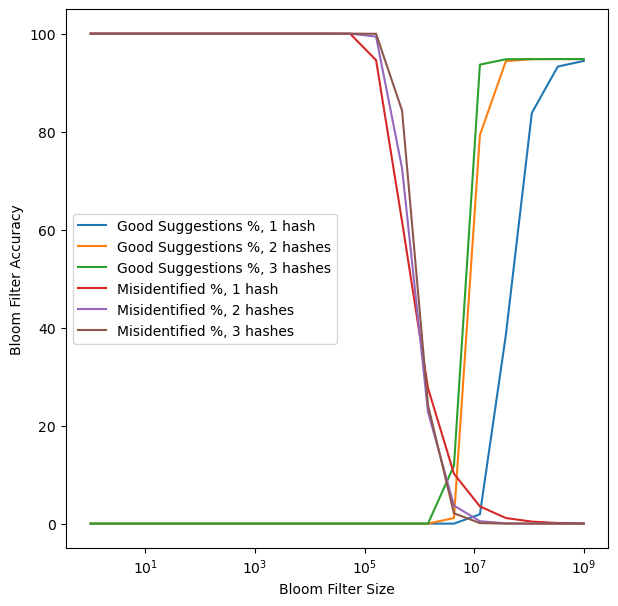

In [131]:
## Graph to show the effect size of the filter 

fig = plt.figure(figsize =(7,7))
plt.xscale('log')
plt.plot(blffiltersize, goodsuggestionaccuracy1, label="Good Suggestions %, 1 hash")
plt.plot(blffiltersize, goodsuggestionaccuracy2, label="Good Suggestions %, 2 hashes")
plt.plot(blffiltersize, goodsuggestionaccuracy3, label="Good Suggestions %, 3 hashes")
plt.plot(blffiltersize, misidentifiedaccuracy1, label="Misidentified %, 1 hash")
plt.plot(blffiltersize, misidentifiedaccuracy2, label="Misidentified %, 2 hashes")
plt.plot(blffiltersize, misidentifiedaccuracy3, label="Misidentified %, 3 hashes")
plt.xlabel('Bloom Filter Size')
plt.ylabel("Bloom Filter Accuracy")
plt.legend(loc="center left")
plt.show()

#### Approximately how many bits is necessary for this approach to give good suggestions (as defined above) 90% of the time when using each of 1, 2, or 3 hash functions as above? 
 - About 10^7 Bits are necessary for this approach to give suggestions 90% of the time when using each of 1, 2, or 3 hash functions.